In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/pca%20%2B%20lda/datasets_308180_627001_Wine.csv'
df = pd.read_csv(url)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import GridSearchCV

# 2-14

2

In [4]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [5]:
df.tail(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,3
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630,3
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,3
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,3
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,3
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560,3


In [6]:
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
52,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190,1
156,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3
152,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425,3
107,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488,2
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680,2
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,2
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750,3
164,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615,3
114,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385,2


3

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


4

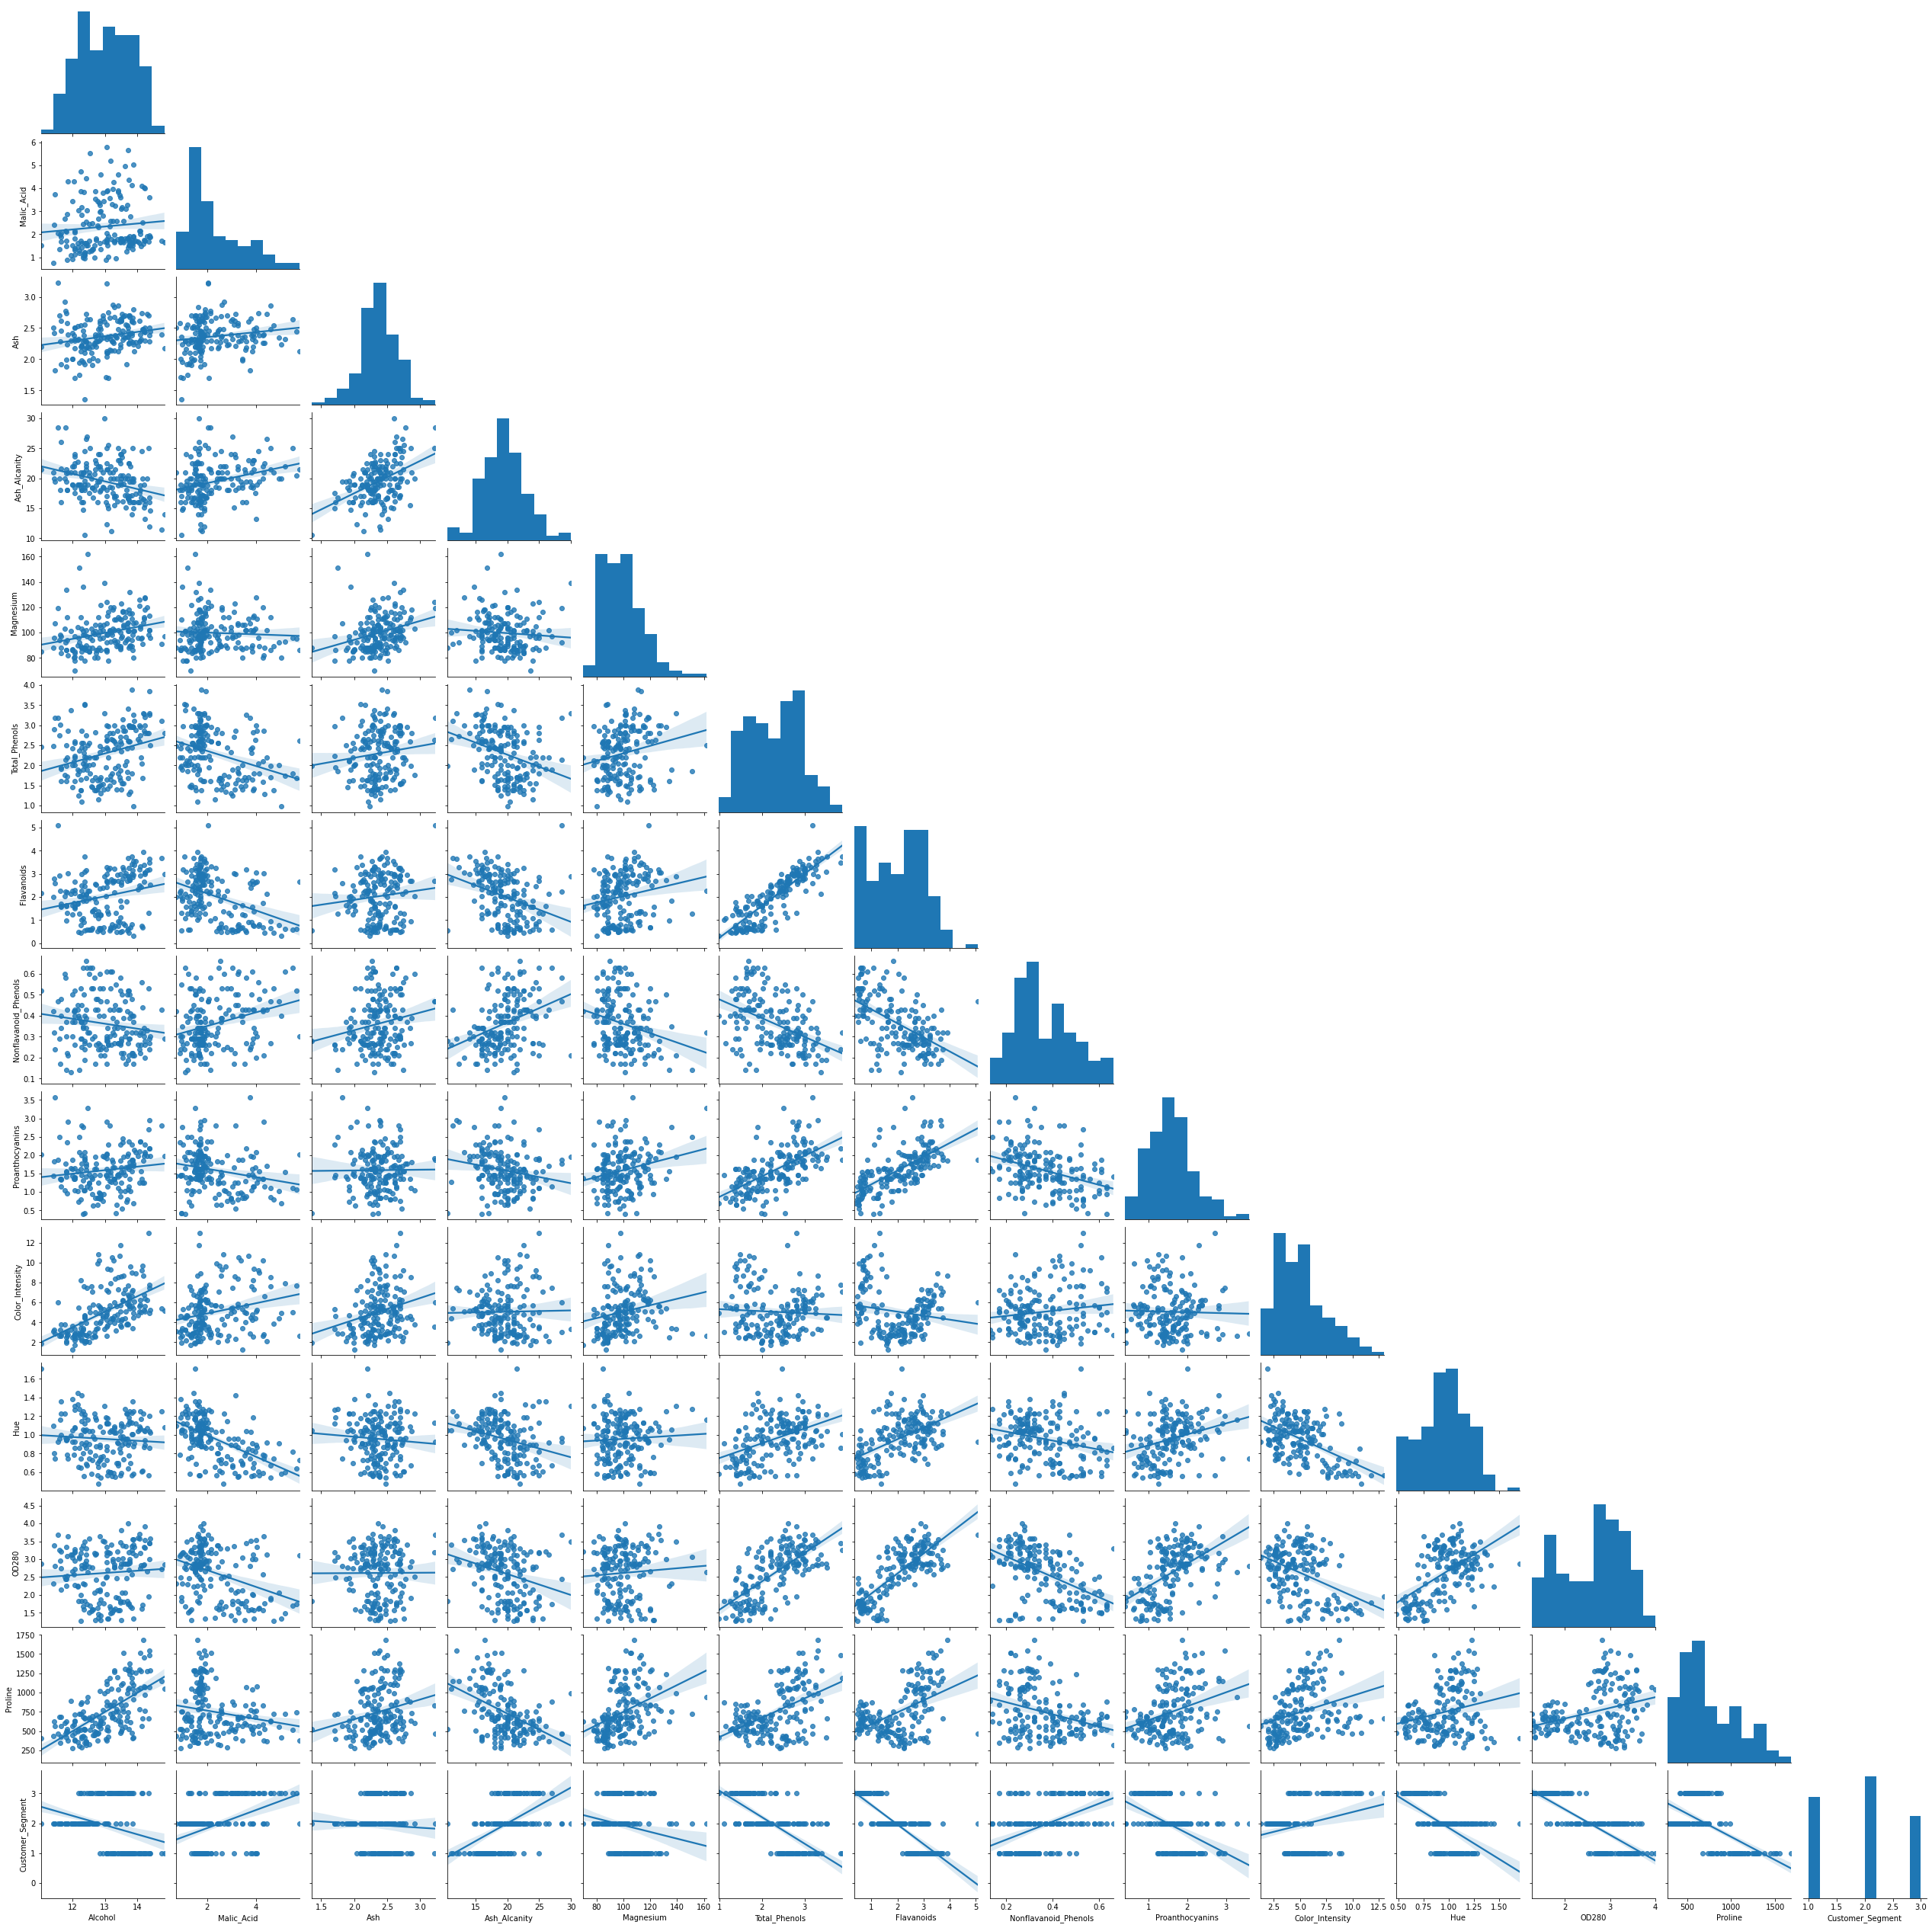

In [9]:
sns.pairplot(df,kind='reg',corner=True)

5

In [10]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


6

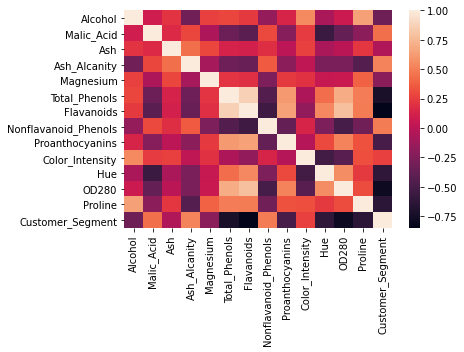

In [11]:
sns.heatmap(df.corr())

7

In [12]:
#หาค่า max min ของ  corr()
dfa = df.drop(df.columns[13],axis=1) #drop column สุดท้ายไม่ให้มีนัยยะต่อการหาค่า corr()

c = dfa.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")

dfb = pd.DataFrame(so)
dfc = dfb[dfb.iloc[:,0] != 1] #ตัดค่าที่เป็น 1 ออก
dfc

,,0
Malic_Acid,Hue,-0.561296
Hue,Malic_Acid,-0.561296
Nonflavanoid_Phenols,Flavanoids,-0.537900
Flavanoids,Nonflavanoid_Phenols,-0.537900
Hue,Color_Intensity,-0.521813
...,...,...
Total_Phenols,OD280,0.699949
Flavanoids,OD280,0.787194
OD280,Flavanoids,0.787194
Flavanoids,Total_Phenols,0.864564


In [13]:
#หาค่า corr() ที่ใกล้ 0 ที่สุด
dfc.abs().sort_values(by = dfc.columns[0]).head(2)

,,0
OD280,Ash,0.003911
Ash,OD280,0.003911


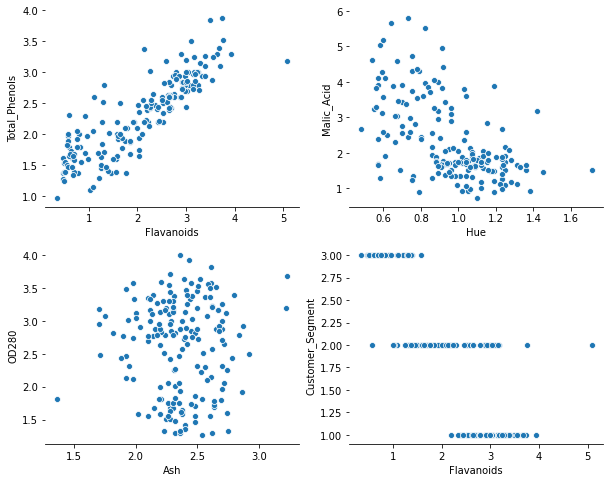

In [14]:
f, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False)
sns.despine(left=True)

sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,5],data=df, ax=axes[0, 0]) #max corr
sns.scatterplot(x=df.iloc[:,10],y=df.iloc[:,1],data=df, ax=axes[0, 1])#min corr
sns.scatterplot(x=df.iloc[:,2],y=df.iloc[:,11],data=df, ax=axes[1, 0]) # corr -> 0
sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,13],data=df, ax=axes[1, 1])

10

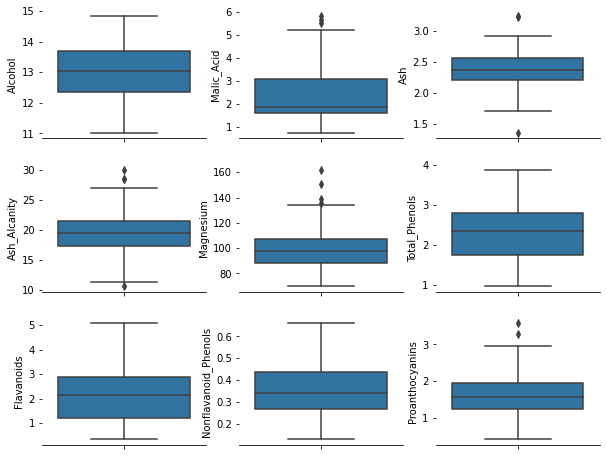

In [15]:
f, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=False)
sns.despine(left=True)

sns.boxplot(df.iloc[:,0],ax=axes[0, 0],orient='v')
sns.boxplot(df.iloc[:,1],ax=axes[0, 1],orient='v')
sns.boxplot(df.iloc[:,2],ax=axes[0, 2],orient='v')
sns.boxplot(df.iloc[:,3],ax=axes[1, 0],orient='v')
sns.boxplot(df.iloc[:,4],ax=axes[1, 1],orient='v')
sns.boxplot(df.iloc[:,5],ax=axes[1, 2],orient='v')
sns.boxplot(df.iloc[:,6],ax=axes[2, 0],orient='v')
sns.boxplot(df.iloc[:,7],ax=axes[2, 1],orient='v')
sns.boxplot(df.iloc[:,8],ax=axes[2, 2],orient='v')

11

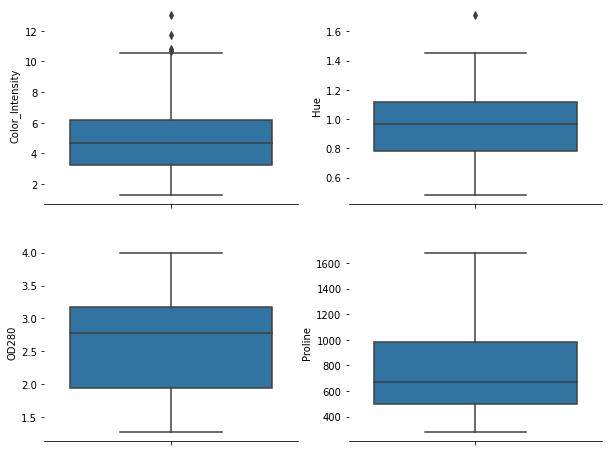

In [16]:
f, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False)
sns.despine(left=True)

sns.boxplot(df.iloc[:,9],ax=axes[0, 0],orient='v')
sns.boxplot(df.iloc[:,10],ax=axes[0, 1],orient='v')
sns.boxplot(df.iloc[:,11],ax=axes[1, 0],orient='v')
sns.boxplot(df.iloc[:,12],ax=axes[1, 1],orient='v')


# 15-16 Split ข้อมูลด้วย train_test_split โดยใช้อัตราส่วน 60:40 และทำ Feature Scaling ด้วย Standardization โดยใช้ข้อมูล X_train เป็นตัว fit

15

In [17]:
target_col = 13 #กำหนด index ให้ label เพื่อความสะดวกในการแก้ code

X = df.drop(df.columns[target_col],axis=1)
y = df.iloc[:,[target_col]] #ใส่ [] คล่อม target_col เพื่อให้ y ,y_train y_test เป็น DataFrame 

X_train , X_test,y_train,y_test = train_test_split(X,y,train_size = 0.6,random_state=100)

16

In [18]:
sc = StandardScaler()

In [19]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 17-23 สร้างโมเดลแบบ Support Vector Machine (เป็น Baseline) วัดผลด้วย confusion matrix ประเมินด้วย Accuracy, F1 score, Recall,Precision ทั้งแบบ Micro, Macro จากนั้นทำ Hyperparameter tuning ด้วย GridSearchCV กับ SVM และวัดประเมินผล

17

In [20]:
svc = SVC()

In [21]:
svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
y_predict = svc.predict(X_test)

18

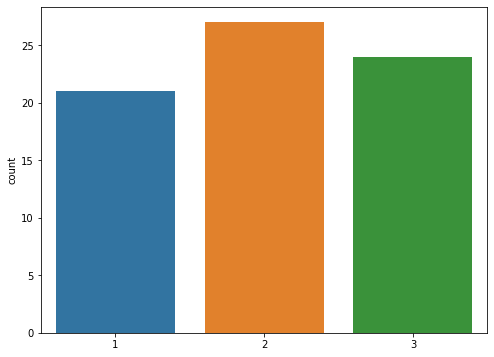

In [23]:
fig = plt.figure(figsize=(8,6))
sns.countplot(y_predict)

19-20

In [24]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 0, 26,  0],
       [ 0,  1, 24]])

In [25]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112)

In [26]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9861111111111112, 0.986907970735464, 0.9876543209876543, 0.9866666666666667)

In [27]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9861111111111112,0.9861111111111112,0.9861111111111112,0.9861111111111112,0.9861111111111112, 0.986907970735464, 0.9876543209876543, 0.9866666666666667,0,0,0,'svc']]

df_compare = pd.DataFrame(data=values,columns=columns)

## 21-23 Hyperparameter tuning

In [28]:
param_com = {'C':[10,100,1000],'gamma':[0.0001,0.001,0.01]}
grid_search = GridSearchCV(svc,param_com)

In [29]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConv

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [31]:
grid_search.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
y_predict = grid_search.predict(X_test)

In [33]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 2, 24,  0],
       [ 0,  0, 25]])

In [34]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222)

In [35]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9722222222222222,
 0.9715151515151516,
 0.9710144927536232,
 0.9743589743589745)

In [36]:
columns = columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9715151515151516,0.9710144927536232,0.9743589743589745,1,0,0,'svc']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)],ignore_index=True)

# 24-30 สร้างโมเดลแบบ Random Forest (เป็น Baseline) วัดผลด้วย confusion matrix ประเมินด้วย Accuracy, F1 score, Recall,Precision ทั้งแบบ Micro, Macro จากนั้นทำ Hyperparameter tuning ด้วย GridSearchCV กับ RF และวัดประเมินผล

24-27

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_predict = rf.predict(X_test)

In [39]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 1, 25,  0],
       [ 0,  0, 25]])

In [40]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112)

In [41]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9861111111111112,
 0.9857121143030856,
 0.9848484848484849,
 0.9871794871794872)

In [42]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9861111111111112,0.9861111111111112,0.9861111111111112,0.9861111111111112,0.9861111111111112,0.9857121143030856,0.9848484848484849,0.9871794871794872,0,0,0,'rf']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)])

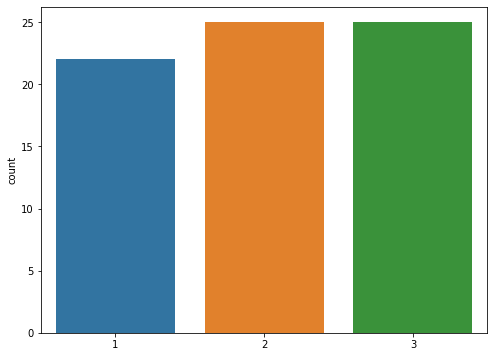

In [43]:
fig = plt.figure(figsize=(8,6))
sns.countplot(y_predict)

## 28-30 Hyperparameter tuning

In [44]:
param_combination = {'max_depth':[4,8,16],'min_samples_leaf':[1,2,4,8],'n_estimators':[10,20,50]}
grid_search1 = GridSearchCV(RandomForestClassifier(),param_combination,verbose=1)

In [45]:
grid_search1.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [46]:
grid_search1.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 20}

In [47]:
grid_search1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
y_predict = grid_search1.predict(X_test)

In [49]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 1, 25,  0],
       [ 0,  0, 25]])

In [50]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112)

In [51]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112)

In [52]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9305555555555556,0.9305555555555556,0.9305555555555556,0.9305555555555556,0.9305555555555556,0.9305555555555556,0.9305555555555556,0.9305555555555556,1,0,0,'rf']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)])

# 31-33

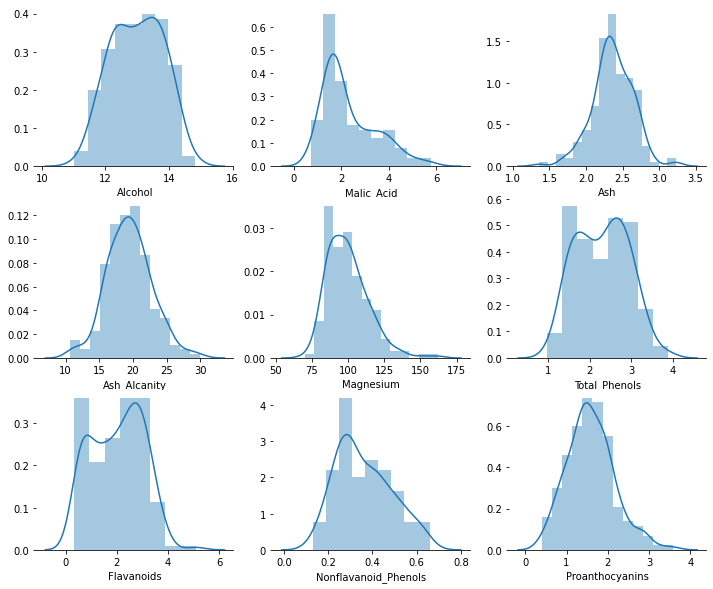

In [53]:
f, axes = plt.subplots(3, 3, figsize=(12, 10), sharex=False)
sns.despine(left=True)

sns.distplot(df.iloc[:,0],ax=axes[0, 0])
sns.distplot(df.iloc[:,1],ax=axes[0, 1])
sns.distplot(df.iloc[:,2],ax=axes[0, 2])
sns.distplot(df.iloc[:,3],ax=axes[1, 0])
sns.distplot(df.iloc[:,4],ax=axes[1, 1])
sns.distplot(df.iloc[:,5],ax=axes[1, 2])
sns.distplot(df.iloc[:,6],ax=axes[2, 0])
sns.distplot(df.iloc[:,7],ax=axes[2, 1])
sns.distplot(df.iloc[:,8],ax=axes[2, 2])

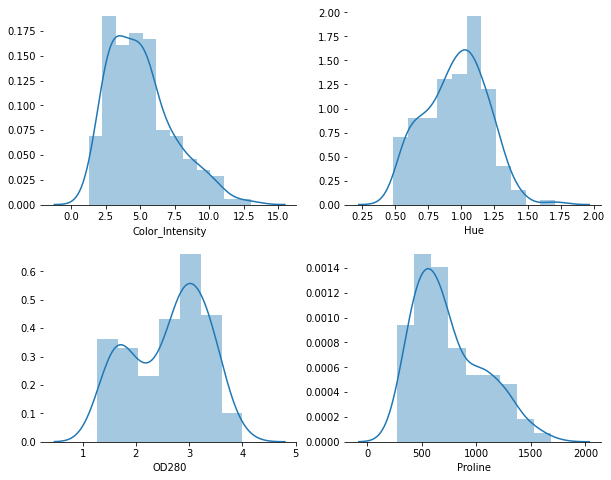

In [54]:
f, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False)
sns.despine(left=True)

sns.distplot(df.iloc[:,9],ax=axes[0, 0])
sns.distplot(df.iloc[:,10],ax=axes[0, 1])
sns.distplot(df.iloc[:,11],ax=axes[1, 0])
sns.distplot(df.iloc[:,12],ax=axes[1, 1])

# 34-36 สร้างตัวแปร Dimensionality Reduction แบบ LDA โดยกำหนด n_components = 2 และดำเนินการ LDA โดยใช้ X_train, y_train เป็นตัว fit และ X_test เป็น transform สร้าง Visualization แบบ Clustering ด้วย LDA ทั้งสองแกน

In [55]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [56]:
a=y_train.values

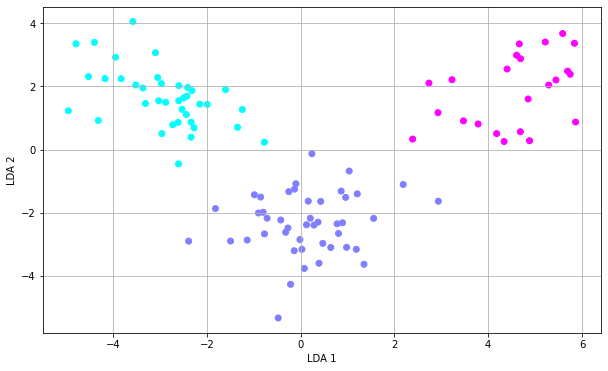

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_lda[:,0],X_train_lda[:,1],cmap='cool',c=a)
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.grid()

# 37-43 สร้างโมเดลแบบ Support Vector Machine (ด้วยComponents จาก LDA) วัดผลด้วย confusion matrix ประเมินด้วย Accuracy, F1 score, Recall,Precision ทั้งแบบ Micro, Macro จากนั้นทำ Hyperparameter tuning ด้วย GridSearchCV กับ SVM และวัดประเมินผล

In [58]:
svc_lda = SVC()
svc_lda.fit(X_train_lda,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
y_predict = svc_lda.predict(X_test_lda)

In [60]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 2, 24,  0],
       [ 0,  0, 25]])

In [61]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222)

In [62]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9722222222222222,
 0.9715151515151516,
 0.9710144927536232,
 0.9743589743589745)

In [63]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9715151515151516,0.9710144927536232,0.9743589743589745,0,1,0,'svc']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)])

## 41-43 Hyperparameter tuning

In [64]:
param_com = {'C':[100,1000,10000],'gamma':[0.00001,0.0001,0.001]}
grid_search_svc_lda = GridSearchCV(svc,param_com)

In [65]:
grid_search_svc_lda.fit(X_train_lda,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConv

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
grid_search_svc_lda.best_params_

{'C': 100, 'gamma': 0.0001}

In [67]:
grid_search_svc_lda.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
y_predict = grid_search_svc_lda.predict(X_test_lda)

In [69]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 2, 24,  0],
       [ 0,  0, 25]])

In [70]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222)

In [71]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9722222222222222,
 0.9715151515151516,
 0.9710144927536232,
 0.9743589743589745)

In [72]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9715151515151516,0.9710144927536232,0.9743589743589745,1,1,0,'svc']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)])

# 44-47 สร้างโมเดลแบบ Random Forrest (ด้วยComponents จาก LDA) วัดผลด้วย confusion matrix ประเมินด้วย Accuracy, F1 score, Recall,Precision ทั้งแบบ Micro, Macro จากนั้นทำ Hyperparameter tuning ด้วย GridSearchCV กับ RF และวัดประเมินผล

In [73]:
rf_lda = RandomForestClassifier()
rf_lda.fit(X_train_lda,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
y_predict = rf_lda.predict(X_test_lda)

In [75]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 1, 24,  1],
       [ 0,  0, 25]])

In [76]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222)

In [77]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9722222222222222,
 0.9723787809697523,
 0.9720279720279721,
 0.9743589743589745)

In [78]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9722222222222222,0.9723787809697523,0.9720279720279721,0.9743589743589745,0,1,0,'rf']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)])

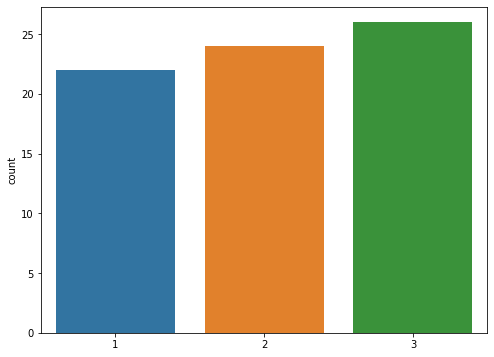

In [79]:
fig = plt.figure(figsize=(8,6))
sns.countplot(y_predict)

## 48-50 Hyperparameter tuning

In [80]:
param_combination = {'max_depth':[4,8,16,32],'min_samples_leaf':[1,2,4,8],'n_estimators':[10,20,50,100]}
grid_search_rf_lda = GridSearchCV(RandomForestClassifier(),param_combination,verbose=1)

In [81]:
grid_search_rf_lda.fit(X_train_lda,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [82]:
grid_search_rf_lda.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 10}

In [83]:
grid_search_rf_lda.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
y_predict = grid_search_rf_lda.predict(X_test_lda)

In [85]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 1, 24,  1],
       [ 0,  0, 25]])

In [86]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222)

In [87]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9722222222222222,
 0.9723787809697523,
 0.9720279720279721,
 0.9743589743589745)

In [88]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444, 0.9448484848484848, 0.943792270531401, 0.9482051282051281,1,1,0,'rf']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)])

# 51-53 สร้างตัวแปร Dimensionality Reduction แบบ PCA โดยกำหนด n_components = 2 ดำเนินการ PCA โดยใช้ X_train เป็นตัว fit และ X_test เป็น transform ทำ Clustering Visualization ของ 2 Components จาก PCA ต่อผลลัพธ์ทั้ง 3 Classes

In [89]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [90]:
df_pca = pd.DataFrame(pca.components_,columns=X.columns)

In [91]:
df_pca

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.187417,-0.222821,0.022910,-0.267077,0.140284,0.403370,0.428209,-0.334037,0.305351,-0.019027,0.244972,0.352864,0.296504
1,-0.433714,-0.195289,-0.180545,0.146878,-0.354638,-0.009117,0.073013,-0.103923,0.037256,-0.533666,0.299062,0.243260,-0.377891


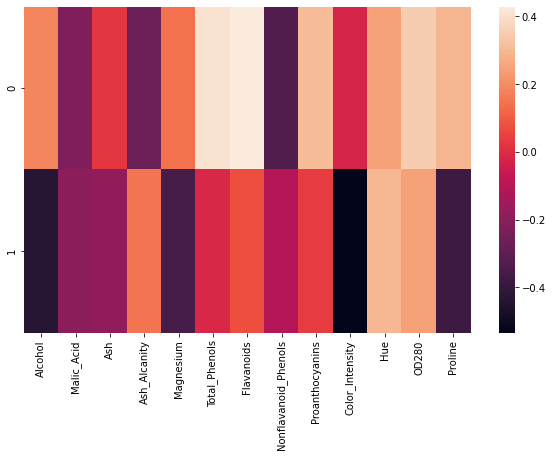

In [92]:
plt.figure(figsize=(10,6))
sns.heatmap(df_pca)

In [93]:
a=y_train.values

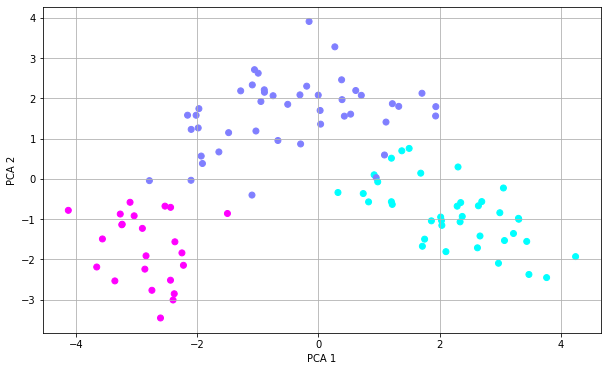

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],cmap='cool',c=a)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()

# 54-60 สร้างโมเดลแบบ Support Vector Machine (ด้วยComponents จาก PCA) วัดผลด้วย confusion matrix ประเมินด้วย Accuracy, F1 score, Recall,Precision ทั้งแบบ Micro, Macro จากนั้นทำ Hyperparameter tuning ด้วย GridSearchCV กับ SVM และวัดประเมินผล

In [95]:
svc.fit(X_train_pca,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
y_predict = svc.predict(X_test_pca)

In [97]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 3, 23,  0],
       [ 0,  0, 25]])

In [98]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334)

In [99]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9583333333333334,
 0.9573696145124716,
 0.9583333333333334,
 0.9615384615384616)

In [100]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9583333333333334,0.9583333333333334,0.9583333333333334,0.9583333333333334,0.9583333333333334,0.9573696145124716,0.9583333333333334,0.9615384615384616,0,0,1,'svc']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)])

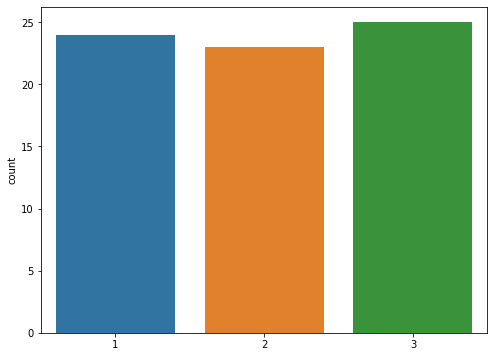

In [101]:
fig = plt.figure(figsize=(8,6))
sns.countplot(y_predict)

##58-60 Hyperparameter tuning

In [102]:
param_com = {'C':[100,1000,10000],'gamma':[0.00001,0.0001,0.001]}
grid_search_svc_pca = GridSearchCV(svc,param_com)

In [103]:
grid_search_svc_pca.fit(X_train_pca,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConv

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [104]:
grid_search_svc_pca.best_params_

{'C': 10000, 'gamma': 0.001}

In [105]:
grid_search_svc_pca.best_estimator_

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [106]:
y_predict = grid_search_svc_pca.predict(X_test_pca)

In [107]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 3, 23,  0],
       [ 0,  1, 24]])

In [108]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444)

In [109]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9444444444444444,
 0.9443083900226757,
 0.9444444444444445,
 0.9482051282051281)

In [110]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9443083900226757,0.9444444444444445,0.9482051282051281,1,0,1,'svc']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)])

#61-67 สร้างโมเดลแบบ Random Forrest (ด้วยComponents จาก PCA) วัดผลด้วย confusion matrix ประเมินด้วย Accuracy, F1 score, Recall,Precision ทั้งแบบ Micro, Macro จากนั้นทำ Hyperparameter tuning ด้วย GridSearchCV กับ RF และวัดประเมินผล

In [111]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
y_predict = rf_pca.predict(X_test_pca)

In [113]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 3, 23,  0],
       [ 0,  0, 25]])

In [114]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334)

In [115]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9583333333333334,
 0.9573696145124716,
 0.9583333333333334,
 0.9615384615384616)

In [116]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9443083900226757,0.9444444444444445,0.9482051282051281,0,0,1,'rf']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)],ignore_index=True)

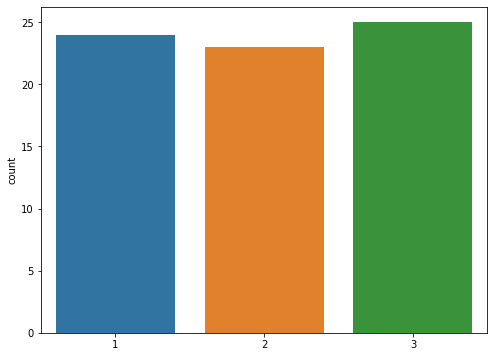

In [117]:
fig = plt.figure(figsize=(8,6))
sns.countplot(y_predict)

##65-67 Hyperparameter tuning

In [118]:
param_combination = {'max_depth':[4,8,16],'min_samples_leaf':[1,2,4],'n_estimators':[10,20,50]}
grid_search_rf_pca = GridSearchCV(RandomForestClassifier(),param_combination,verbose=1)

In [119]:
grid_search_rf_pca.fit(X_train_pca,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [120]:
grid_search_rf_pca.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 20}

In [121]:
grid_search_rf_pca.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
y_predict = grid_search_rf_pca.predict(X_test_pca)

In [123]:
confusion_matrix(y_test,y_predict)

array([[21,  0,  0],
       [ 3, 23,  0],
       [ 0,  0, 25]])

In [124]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334)

In [125]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9583333333333334,
 0.9573696145124716,
 0.9583333333333334,
 0.9615384615384616)

In [126]:
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac','hyp','lda','pca','method']
values = [[0.9305555555555556,0.9305555555555556,0.9305555555555556,0.9305555555555556,0.9305555555555556,0.9302145100464427,0.9298550724637682,0.9323321123321122,1,0,1,'rf']]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns)],ignore_index=True)

# 68-70 Data Visualization

In [127]:
df_compare

,acc_mic,f1_mic,ps_mic,rs_mic,acc_mac,f1_mac,ps_mac,rs_mac,hyp,lda,pca,method
0,0.986111,0.986111,0.986111,0.986111,0.986111,0.986908,0.987654,0.986667,0,0,0,svc
1,0.972222,0.972222,0.972222,0.972222,0.972222,0.971515,0.971014,0.974359,1,0,0,svc
2,0.986111,0.986111,0.986111,0.986111,0.986111,0.985712,0.984848,0.987179,0,0,0,rf
3,0.930556,0.930556,0.930556,0.930556,0.930556,0.930556,0.930556,0.930556,1,0,0,rf
4,0.972222,0.972222,0.972222,0.972222,0.972222,0.971515,0.971014,0.974359,0,1,0,svc
5,0.972222,0.972222,0.972222,0.972222,0.972222,0.971515,0.971014,0.974359,1,1,0,svc
6,0.972222,0.972222,0.972222,0.972222,0.972222,0.972379,0.972028,0.974359,0,1,0,rf
7,0.944444,0.944444,0.944444,0.944444,0.944444,0.944848,0.943792,0.948205,1,1,0,rf
8,0.958333,0.958333,0.958333,0.958333,0.958333,0.957370,0.958333,0.961538,0,0,1,svc
9,0.944444,0.944444,0.944444,0.944444,0.944444,0.944308,0.944444,0.948205,1,0,1,svc


##68

In [128]:
df_compareX = df_compare[df_compare.iloc[:,8]==0].drop(df_compare.columns[:4],axis=1)

In [129]:
df_compareX

,acc_mac,f1_mac,ps_mac,rs_mac,hyp,lda,pca,method
0,0.986111,0.986908,0.987654,0.986667,0,0,0,svc
2,0.986111,0.985712,0.984848,0.987179,0,0,0,rf
4,0.972222,0.971515,0.971014,0.974359,0,1,0,svc
6,0.972222,0.972379,0.972028,0.974359,0,1,0,rf
8,0.958333,0.957370,0.958333,0.961538,0,0,1,svc
10,0.944444,0.944308,0.944444,0.948205,0,0,1,rf


In [130]:
j = 0
for i in df_compareX.iloc[:,5]:
  if i == 1:
    df_compareX.iloc[j,7] = df_compareX.iloc[j,7] + '+' +df_compareX.columns[5]
  j = j+1

j = 0
for i in df_compareX.iloc[:,6]:
  if i == 1:
    df_compareX.iloc[j,7] = df_compareX.iloc[j,7] + '+' +df_compareX.columns[6]
  j = j+1

In [131]:
df_compareX

,acc_mac,f1_mac,ps_mac,rs_mac,hyp,lda,pca,method
0,0.986111,0.986908,0.987654,0.986667,0,0,0,svc
2,0.986111,0.985712,0.984848,0.987179,0,0,0,rf
4,0.972222,0.971515,0.971014,0.974359,0,1,0,svc+lda
6,0.972222,0.972379,0.972028,0.974359,0,1,0,rf+lda
8,0.958333,0.957370,0.958333,0.961538,0,0,1,svc+pca
10,0.944444,0.944308,0.944444,0.948205,0,0,1,rf+pca


In [132]:
df_ = pd.melt(df_compareX, id_vars=['method'], value_vars=['acc_mac', 'f1_mac','ps_mac','rs_mac'])

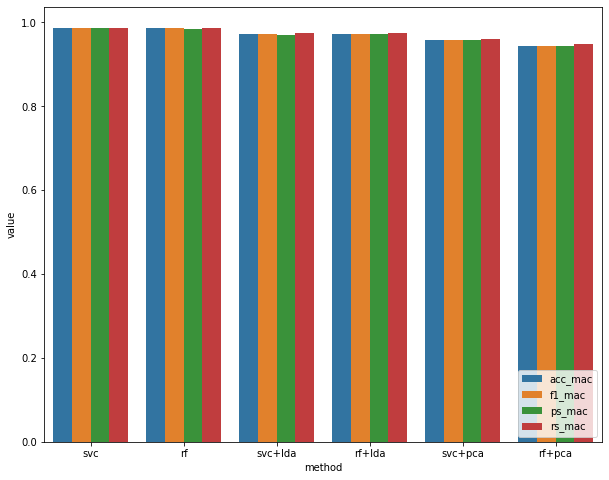

In [133]:
fig =  plt.figure(figsize=(10,8))
sns.barplot(x='method',y='value',data=df_,hue='variable')
plt.legend(loc='lower right')

##69

In [134]:
df_compareX = df_compare[df_compare.iloc[:,8]!=0].drop(df_compare.columns[:4],axis=1)

In [135]:
df_compareX

,acc_mac,f1_mac,ps_mac,rs_mac,hyp,lda,pca,method
1,0.972222,0.971515,0.971014,0.974359,1,0,0,svc
3,0.930556,0.930556,0.930556,0.930556,1,0,0,rf
5,0.972222,0.971515,0.971014,0.974359,1,1,0,svc
7,0.944444,0.944848,0.943792,0.948205,1,1,0,rf
9,0.944444,0.944308,0.944444,0.948205,1,0,1,svc
11,0.930556,0.930215,0.929855,0.932332,1,0,1,rf


In [136]:
j = 0
for i in df_compareX.iloc[:,5]:
  if i == 1:
    df_compareX.iloc[j,7] = df_compareX.iloc[j,7] + '+' +df_compareX.columns[5]
  j = j+1

j = 0
for i in df_compareX.iloc[:,6]:
  if i == 1:
    df_compareX.iloc[j,7] = df_compareX.iloc[j,7] + '+' +df_compareX.columns[6]
  j = j+1

In [137]:
df_compareX

,acc_mac,f1_mac,ps_mac,rs_mac,hyp,lda,pca,method
1,0.972222,0.971515,0.971014,0.974359,1,0,0,svc
3,0.930556,0.930556,0.930556,0.930556,1,0,0,rf
5,0.972222,0.971515,0.971014,0.974359,1,1,0,svc+lda
7,0.944444,0.944848,0.943792,0.948205,1,1,0,rf+lda
9,0.944444,0.944308,0.944444,0.948205,1,0,1,svc+pca
11,0.930556,0.930215,0.929855,0.932332,1,0,1,rf+pca


In [138]:
df_ = pd.melt(df_compareX, id_vars=['method'], value_vars=['acc_mac', 'f1_mac','ps_mac','rs_mac'])

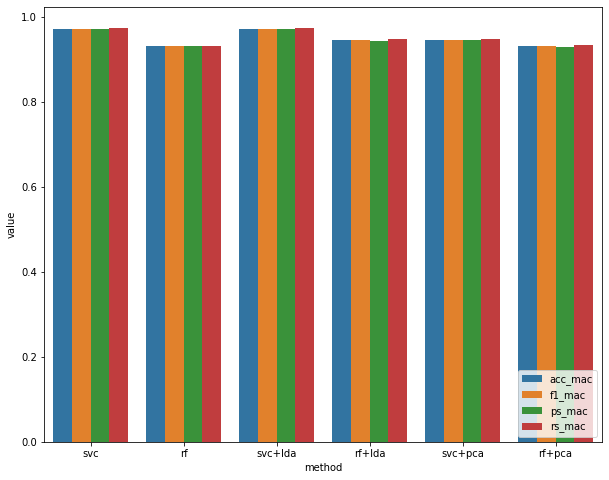

In [139]:
fig =  plt.figure(figsize=(10,8))
sns.barplot(x='method',y='value',data=df_,hue='variable')
plt.legend(loc='lower right')

##70

In [140]:
df_compareX = df_compare[(df_compare.iloc[:,9]!=0) | (df_compare.iloc[:,10]!=0)][df_compare.iloc[:,8]!=1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [141]:
df_compareX

,acc_mic,f1_mic,ps_mic,rs_mic,acc_mac,f1_mac,ps_mac,rs_mac,hyp,lda,pca,method
4,0.972222,0.972222,0.972222,0.972222,0.972222,0.971515,0.971014,0.974359,0,1,0,svc
6,0.972222,0.972222,0.972222,0.972222,0.972222,0.972379,0.972028,0.974359,0,1,0,rf
8,0.958333,0.958333,0.958333,0.958333,0.958333,0.957370,0.958333,0.961538,0,0,1,svc
10,0.944444,0.944444,0.944444,0.944444,0.944444,0.944308,0.944444,0.948205,0,0,1,rf


In [142]:
j = 0
for i in df_compareX.iloc[:,9]:
  if i == 1:
    df_compareX.iloc[j,11] = df_compareX.iloc[j,11] + '+' +df_compareX.columns[9]
  j = j+1

j = 0
for i in df_compareX.iloc[:,10]:
  if i == 1:
    df_compareX.iloc[j,11] = df_compareX.iloc[j,11] + '+' +df_compareX.columns[10]
  j = j+1

In [143]:
df_ = df_compareX.drop(df_compareX.columns[[1,2,3,5,6,7,8,9,10]],axis=1)

In [144]:
df_

,acc_mic,acc_mac,method
4,0.972222,0.972222,svc+lda
6,0.972222,0.972222,rf+lda
8,0.958333,0.958333,svc+pca
10,0.944444,0.944444,rf+pca


In [145]:
import plotly.graph_objects as go

In [146]:
model=df_.iloc[:,2]

fig = go.Figure(data=[
    go.Bar(name='micro', x=model, y=df_.iloc[:,0]),
    go.Bar(name='macro', x=model, y=df_.iloc[:,1])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='ACC')
fig.show()

<Figure size 1080x1008 with 0 Axes>

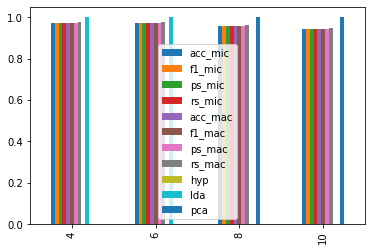

In [147]:
fig = plt.figure(figsize=(15,14))
df_compareX.plot(kind='bar')